<a href="https://colab.research.google.com/github/AdrianArguello/cancer-de-mama/blob/main/Previsi%C3%B3n_C%C3%A1ncer_de_mama_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
df =pd.read_csv("datacancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#Excluimos datos que no aportan al modelo
df = df.drop(['id', 'Unnamed: 32'], axis=1)


In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Definir función gráfico pizza
def grafico_pizza(data_frame, columna, colores, explode, titulo, fonte):

    df = data_frame[columna].value_counts()
    
    # Tamaño del plot
    plt.figure(figsize=(10, 15))
    
    # Creando gráfico de pizza
    _, _, pacotes = plt.pie(df,
                            colors=colores,
                            labels=df.index,
                            explode=explode,
                            shadow=True,
                            startangle=90,
                            autopct='%1.1f%%',
                            textprops={'fontsize': fonte,
                                      'color': 'black',
                                      'weight': 'bold',
                                      'family': 'serif'})
    
    # Plotear gráfico de pizza
    plt.setp(pacotes, color='white')
    
    # tamaño titulo
    plt.title(titulo, size=40)
    
    #  círculo interno
    circulo_centro = plt.Circle((0, 0), 0.40, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circulo_centro)

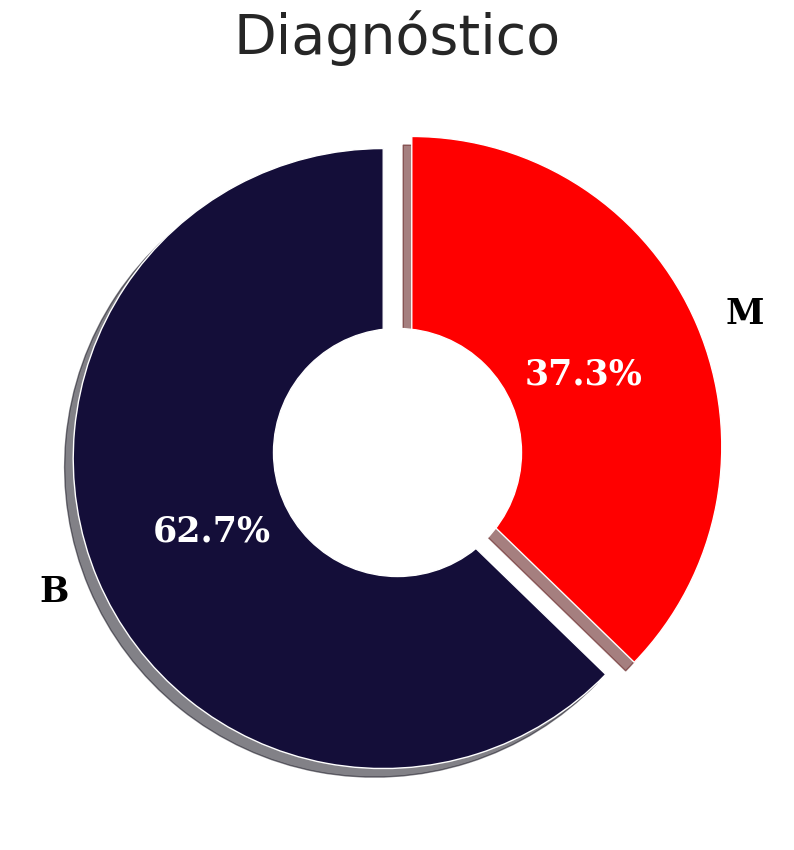

In [ ]:
grafico_pizza(df, 'diagnosis', ('#140E39', '#FF0000'), (0.05, 0.05), 'Diagnóstico', 25)

In [ ]:
#Convirtiendo datos categoricos a numericos
from sklearn import preprocessing

In [ ]:
#creamos una lista para almacenar las columnas con el mismo tipo de dato
columnas = [columna for columna in df.columns if df[columna].dtype == 'object']

# Crear el codificador
codificador = preprocessing.LabelEncoder()

# Codificar cada columna en un conjunto de datos
for columna in columnas:
    df[columna] = codificador.fit_transform(df[columna])

In [ ]:
#clasificamos tumor maligno(M) en 1 y tumor benigno(B) como 0
df['diagnosis'].tail()

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64

Como nuestro conjunto de datos tiene 30 columnas a analizar solo tomaremos las que tienen un indice de correlación superior a 0,70

In [ ]:
for columnas in df.columns:
    # Esto evita correlacionar la columna "diagnosis" con "diagnosis", ya que siempre será 1
    if columnas != 'diagnosis':
        # Correlacionar la columna "diagnosis" con todas las otras columnas
        if df['diagnosis'].corr(df[columnas]) >= 0.7:
            print(f'{columnas}: {df["diagnosis"].corr(df[columnas]):.2f}')

radius_mean: 0.73
perimeter_mean: 0.74
area_mean: 0.71
concave points_mean: 0.78
radius_worst: 0.78
perimeter_worst: 0.78
area_worst: 0.73
concave points_worst: 0.79


Creamos el modelo

In [ ]:
#separamos el conjunto de datos en dos grupos uno con la informacion del paciente y la otra con el resultado(diagnosis)

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

Utilizaremos varios algoritmos de machine learning para observar cual se ajusta mejor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                                max_features=2, n_estimators=500, random_state=0)

# kNN
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='uniform', n_jobs=-1)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=70, max_features=2, random_state=0, n_jobs=-1)

In [ ]:
# Entrenando Gradient Boosting Classifier
gbc.fit(X_train, y_train)



GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                           max_features=2, n_estimators=500, random_state=0)

In [ ]:
# Entrenando kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [ ]:
# Entrenando Random Forest Classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features=2, n_estimators=500,
                       n_jobs=-1, random_state=0)

Matriz de confusión

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [ ]:
#Creamos una función que nos de la metricas y la matriz de confución

def metricas(X_test, y_test, classificador, nome_clf):
    # Predecir el resultado
    y_pred = classificador.predict(X_test)
    
    # metrica de la exactitud
    accuracy = accuracy_score(y_test, y_pred)
    
    # Métrica de precisión
    precision = precision_score(y_test, y_pred)
    
    # Métrica de recall
    recall = recall_score(y_test, y_pred)
    
    # Métrica de puntuación F1
    f1 = f1_score(y_test, y_pred)
    
    # Mostrar los valores  de las  métricas
    print(f'''{nome_clf}

Accuracy: {accuracy:.3f}

Precisión: {precision:.3f}

Recall: {recall:.3f}

Puntuación F1: {f1:.3f}''')
    
    # crear la matriz de confución
    matriz = confusion_matrix(y_test, y_pred)
    
    # crear un dataframe para almacenar los datos  de "y_pred" e "y_test"
    df_mc = pd.DataFrame(matriz, index=['B', 'M'], columns=['B', 'M'])
    
    # Determinar el tamaño del plot
    plt.figure(figsize=(10, 5))
    
    # Crear plot
    mapa_calor = sns.heatmap(data=df_mc,
                            annot=True,
                            cmap='RdPu',
                            fmt='.5g',
                            annot_kws={'size': 20})
    
    #  título da matriz de confusión
    mapa_calor.set_title(f'Matriz de Confusión {nome_clf}', fontsize=25, y=1.05)
    
    # Adicionar la legenda
    plt.xlabel('Valores Previstos', fontsize=20)
    plt.ylabel('Valores Reales', fontsize=20)
    
    # Mostrar a matriz de confusión
    plt.show()

Gradient Boosting Classifier

Accuracy: 0.965

Precisión: 0.952

Recall: 0.952

Puntuación F1: 0.952


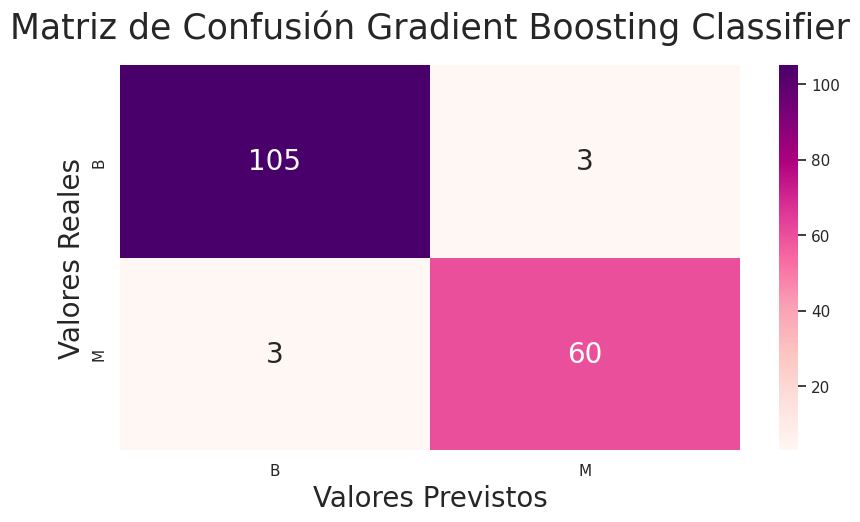

In [ ]:
metricas(X_test, y_test, gbc, 'Gradient Boosting Classifier')

kNN

Accuracy: 0.947

Precisión: 0.922

Recall: 0.937

Puntuación F1: 0.929


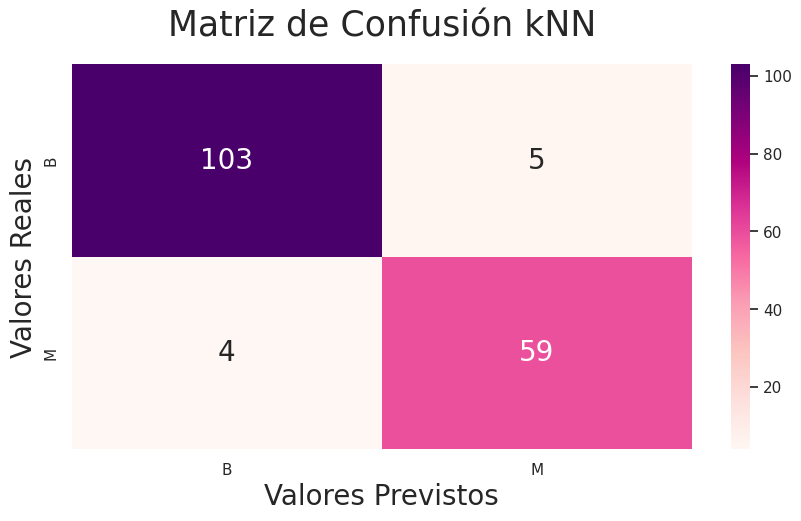

In [ ]:
# Mostrar las métricas de la matriz de confusión de kNN
metricas(X_test, y_test, knn, 'kNN')

Random Forest Classifier

Accuracy: 0.953

Precisión: 0.937

Recall: 0.937

Puntuación F1: 0.937


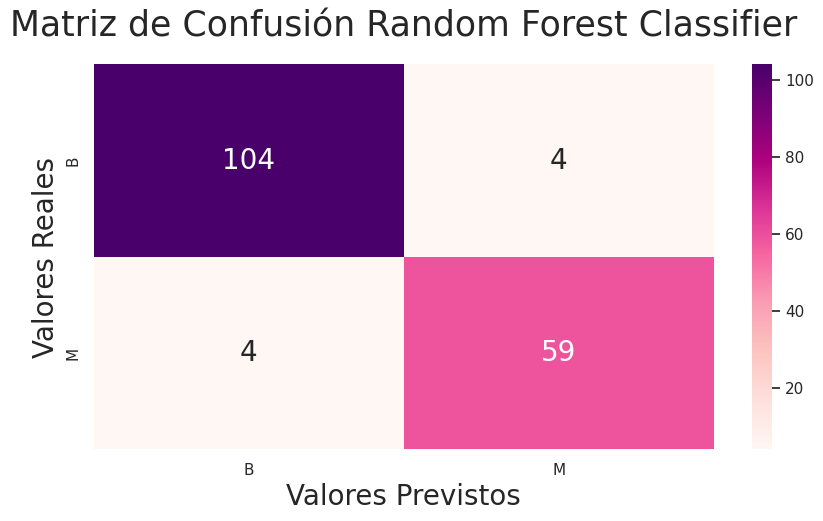

In [ ]:
# Mostrar las métricas de la matriz de confusión de Random Forest Classifier
metricas(X_test, y_test, rfc, 'Random Forest Classifier')